In [38]:
import pandas as pd
base = pd.read_csv('house-prices.csv')

In [39]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
#Transformar o preço e o metro quadrado em vetor

In [41]:
x = base.iloc[:,5].values
x = x.reshape(-1,1)

In [42]:
x.shape

(21613, 1)

In [43]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [44]:
y = base.iloc[:,2:3].values

In [45]:
y.shape

(21613, 1)

In [46]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [47]:
#Escalonar valores
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

C:\Users\marcus.mendes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\marcus.mendes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
x

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [49]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

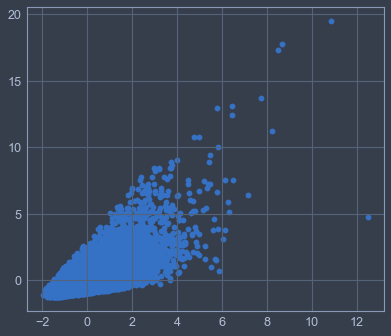

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
plt.scatter(x,y)

#Formula regressão linear simples
y = b0 + b1 * x

In [51]:
import numpy as np
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [60]:
import tensorflow as tf

In [61]:
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [64]:
batch_size = 32
xph = tf.placeholder(tf.float32,[batch_size,1])
yph = tf.placeholder(tf.float32,[batch_size,1])

In [68]:
y_modelo = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_modelo)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()


In [70]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        indices = np.random.randint(len(x), size = batch_size)
        feed = {xph: x[indices], yph: y[indices]}
        sess.run(treinamento, feed_dict = feed)
    b0_final, b1_final = sess.run([b0, b1])    

In [72]:
b0_final

-0.0029729086

In [74]:
b1_final

0.6993712

In [75]:
previsoes = b0_final + b1_final * x

In [76]:
previsoes

array([[-0.68824132],
       [ 0.37023559],
       [-1.00045394],
       ...,
       [-0.81008039],
       [-0.36841377],
       [-0.81008039]])

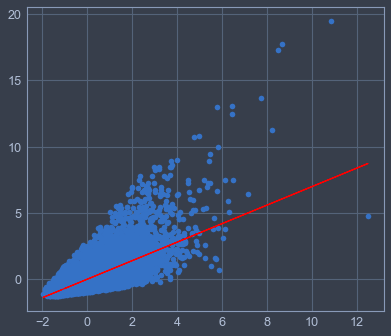

In [80]:
plt.plot(x , y ,'o')
plt.plot(x,previsoes,color='red')

In [81]:
y1 = scaler_y.inverse_transform(y)
previsoes1 = scaler_y.inverse_transform(previsoes)

In [82]:
y1

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [84]:
previsoes1

array([[287421.88046467],
       [676008.55157291],
       [172802.79042555],
       ...,
       [242692.4794738 ],
       [404836.55806572],
       [242692.4794738 ]])

In [85]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1, previsoes1)
mae

173422.1459453226